# The Probability Mass Function (PMF)

## Introduction

In this lesson, you'll look at a way to represent discrete distributions - the probability mass function (PMF), which maps from each value to its probability.


## Objectives

You will be able to:

* Describe how probability is represented in the probability mass function
* Visualize the PMF and describe its relationship with histograms

## What is a Probability Mass Function (PMF)?

A probability mass function (PMF), sometimes referred to as a frequency function, is a function that associates probabilities with discrete random variables. You already learned about this in the context of coin flips and dice rolls. The **discrete** part in discrete distributions means that there is a **known number of possible outcomes**. 

**Based on your experience of rolling a dice**, you can develop a PMF showing the probabilities of each possible value between 1 and 6 occurring.


More formally:

> The Probability Mass Function (PMF) maps a probability ($P$) of observing an outcome $x$ of our discrete random variable $X$ in a way that this function takes the form $f(x) = P(X = x)$.

$X$ being a discrete random variable, we can say that the range $R_X$ is a countable set of all possible values of X. 
They can be represented as a set as follows:

$R_x = \{ x_1,x_2,x_3,\ldots \}$

where $x_1,x_2,x_3,\ldots$ are the possible values of $x$. 


Say we are interested in quantifying the probability that $X$ is equal to some given quantity $x_3$. That is, we want to know $P(x_3)$. For example, in the case of our dice, we might be interested in the probability of getting a 3,  which, in this case, would be $P(3) = \dfrac{1}{6}$

Think of the event $A$, such that  $A = \{ X = x_k \}$ is defined as the set of outcomes $s$ in the sample space $S$ for which the corresponding value of $X$ is equal to $x_k$.  This can be written as:

$$\large A = \{ s \in S \mid X(s) = x_k \}$$

(Remember that $s \in S$ is mathematical notation for "$s$ belongs to $S$" or "$s$ is in $S$"). 

## PMF Intuition

Let's work through a brief example calculating the probability mass function for a discrete random variable!

A **probability** is a number in the range [0,1] that is calculated as the *frequency expressed as a fraction of the sample size.* This means that, in order to convert any random variable's frequency into a probability, we need to perform the following steps:

* Get the frequency of every possible value in the dataset
* Divide the frequency of each value by the total number of values (length of dataset)
* Get the probability for each value

Let's show this using a simple toy example:

In [1]:
# Count the frequency of values in a given dataset
import collections
x = [1,1,1,1,2,2,2,2,3,3,4,5,5]
counter = collections.Counter(x)
print(counter)

print(len(x))

Counter({1: 4, 2: 4, 3: 2, 5: 2, 4: 1})
13


You'll notice that this returned a dictionary, with keys being the possible outcomes, and values of these keys set to the frequency of items. You can calculate the PMF using step 2 above. 

_Note: You can read more about the `collections` library [here](https://docs.python.org/3.6/library/collections.html)._

In [2]:
# Convert frequency to probability - divide each frequency value by total number of values
pmf = []
for key,val in counter.items():
    pmf.append(round(val/len(x), 2))
    
print(counter.keys(), pmf)

dict_keys([1, 2, 3, 4, 5]) [0.31, 0.31, 0.15, 0.08, 0.15]


You notice that the PMF is normalized so the total probability is 1.

In [3]:
import numpy as np

np.array(pmf).sum()

1.0

If we want, we can write this as an actual Python function, which is "trained" using the global variables `x` and `counter` we have already declared.

In [5]:
def p(x_i):
    frequency = counter[x_i]
    total_number = len(x)
    return frequency / total_number

print("p(1) =", p(1))
print("p(3) =", p(3))

p(1) = 0.3076923076923077
p(3) = 0.15384615384615385


## Visualizing a PMF

You can inspect the probability mass function of a discrete variable by visualizing the distribution using `matplotlib`. You can use a simple bar graph to show the probability mass function using the probabilities calculated above. 

Here's the code:

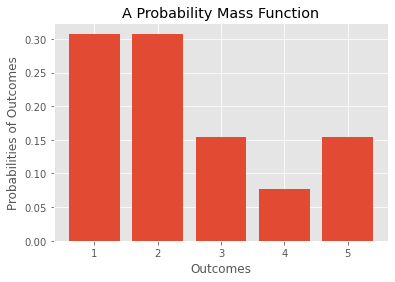

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

outcomes = counter.keys()

plt.bar(outcomes, [p(x_i) for x_i in outcomes]);
plt.title("A Probability Mass Function")
plt.xlabel("Outcomes")
plt.ylabel("Probabilities of Outcomes");

This looks pretty familiar. It's essentially a normalized histogram! The PMF has already calculated all of the x values and heights for us, so we are using a bar graph to show it.

If we weren't using a PMF, we could use a histogram to bin the data for us and produce a similar plot. You can use `plt.hist(x)` to obtain the histogram.

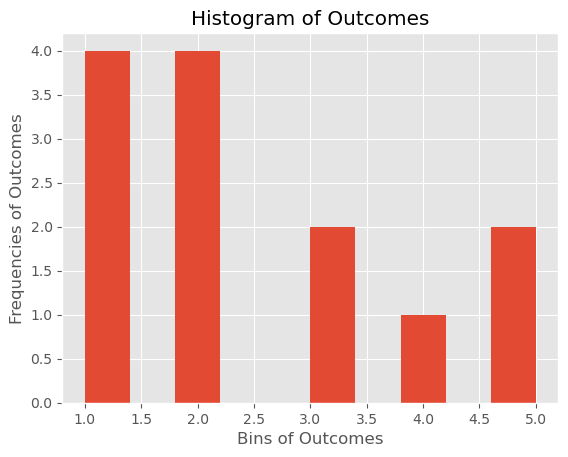

In [6]:
plt.hist(x);
plt.title("Histogram of Outcomes")
plt.xlabel("Bins of Outcomes")
plt.ylabel("Frequencies of Outcomes");

If you look carefully, there are two differences between this histogram and the graph of the PMF above:

1. In the PMF graph, the y-axis represents the probabilities, where as in the histogram it represents the frequencies (raw counts). Those histogram values are the same as `counter.values()`.
2. In the histogram, the domain (set of input/x values) has been translated into bins along a continuous x, rather than a series of categorical labels (as in the bar graph). This is why the numbers along the bottom don't line up as neatly with the bars.

We can tweak the histogram somewhat so that it is closer to the PMF bar graph. First, we can specify `density=True` so that the y-axis will show probabilities. Then we can also customize some of the x-axis scaling and styling.

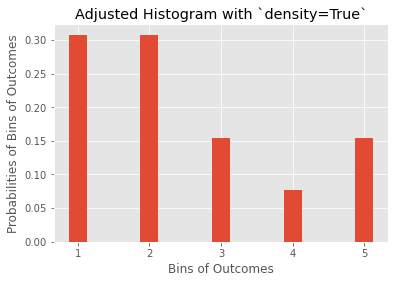

In [7]:
xtick_locations = range(1,6)
bins = np.arange(6)+0.5
plt.hist(x, bins=bins,  rwidth=0.25, density=True)
plt.xticks(ticks=xtick_locations)
plt.xlabel('Bins of Outcomes')
plt.ylabel('Probabilities of Bins of Outcomes')
plt.title("Adjusted Histogram with `density=True`");

### Why Compare PMF Bar Graph vs. Histogram?

The idea here is to help you understand the key distinctions between a PMF bar graph and a typical histogram for showing the probabilities of categorical data.

Because a PMF is designed to work with discrete (categorical) data in the first place, no binning, counting, or normalization is needed to display the probability of each possible x value.

Histograms are typically used with continuous data to show frequencies, although they can be adapted to show similar information to PMFs. The most important thing to customize is the `density=True` argument, which tells the histogram to normalize the values and display probabilities rather than frequencies.

## Measures of Central Tendency and Spread

When talking about distributions, there will generally be two descriptive quantities you're interested in: the central tendency and the spread. Here we'll specifically focus on the mean (also known as the **expected value**) and the **variance**.

### Expected Value

For discrete distributions, the expected value of your discrete random value X is given by:

$$\large E(X) = \mu = \sum_i p(x_i)x_i$$

This is the same familiar algorithm for finding the mean (add everything up and divide by the count), just done in a different order and written a little differently.

Take the very simple example of the dataset `[2, 5, 5]`. The way you usually might find the mean would be to calculate the sum $2 + 5 + 5$ and divide by the count $3$ to get $\frac{12}{3}$, i.e. $4$.

Using this formula instead, we calculate the probability of each number first:

* $p(2)$ = 1 (the number of times 2 appears in the dataset) divided by 3 (the total number of values), i.e. $\frac{1}{3}$
* $p(5)$ = 2 (the number of times 5 appears in the dataset) divided by 3 (the total number of values), i.e. $\frac{2}{3}$

Then multiply each by the value:

* $p(2) \cdot 2$ = $\frac{1}{3} \cdot 2$ = $\frac{2}{3}$
* $p(5) \cdot 5$ = $\frac{2}{3} \cdot 5$ = $\frac{10}{3}$

Then sum them ($\Sigma$ means we take the sum):

$\frac{2}{3} + \frac{10}{3} = \frac{12}{3} = 4$

The same value as before!

Note that with discrete distributions, it is possible for the expected or mean value to be an impossible/invalid value, e.g. a fair coin flip where heads is $1$ and tails is $0$ would have an expected value of $0.5$, even though it is impossible to flip a coin and get $0.5$.

### Variance

The variance is given by:

$$\large E((X-\mu)^2) = \sigma^2 = \sum_i p(x_i)(x_i-\mu)^2$$

In other words, the variance is the sum of the probabilities of each $x_i$ times the squared difference between that $x_i$ and the expected value. Similar to the mean above, this is just a minor reordering of the variance formulas.

(Also, recall that standard deviation $\sigma$ is the square root of the variance $\sigma^2$.)

### A Longer Example

Let's return to using the example collection from earlier. Note that this is the original dataset:

In [8]:
x

[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 5, 5]

These are the possible outcomes:

In [9]:
outcomes

dict_keys([1, 2, 3, 4, 5])

And we have a function `p` that will return the probability of a given $x_i$:

In [10]:
p(4)

0.07692307692307693

We can calculate the expected value $\mu$ like this:

In [11]:
mu = sum([p(x_i)*x_i for x_i in outcomes])
mu

2.4615384615384617

And we can calculate the variance $\sigma^2$ like this:

In [12]:
variance = sum([p(x_i)*((x_i - mu)**2) for x_i in outcomes])
variance

1.940828402366864

The following table shows all of the intermediate steps being calculated here:

| Formula     | Name     | `i=0`  | `i=1`  | `i=2`  | `i=3`  | `i=4`  | $\sum$ |
| ----------- | -------- | ------ | ------ | ------ | ------ | ------ | ------ |
|<img width=100/>|<img width=150/>|<img width=80/>|<img width=80/>|<img width=80/>|<img width=80/>|<img width=80/>|<img width=100/>|
| $x_i$       | outcome   | 1      | 2      | 3      | 4      | 5      |        |
| $p(x_i)$    | probability | $0.31$ | $0.31$ | $0.15$ | $0.08$ | $0.15$ | $1$ (i.e. $P(\Omega)$) 
| $p(x_i)x_i$ |  | $0.31$  | $0.62$  | $0.46$ | $0.31$  |$0.77$   |  $2.46$ (i.e. $\mu$)  |
| $(x_i-\mu)^2$| squared difference from the mean | $2.14$ | $0.213$ | $0.300$ | $2.37$ | $6.44$ |
| $ p(x_i)(x_i-\mu)^2$|  | $0.657$ | $0.0655$ | $0.0446$ |$0.182$ | $0.991$ | $1.94$ (i.e. $\sigma^2$) |



As you can see from the far right column, the expected value is equal to 2.46 and the variance is equal to 1.94. This matches up with our previously-computed values.

Even though for this example these values may not be super informative, you'll learn how these two descriptive quantities are often important parameters in many distributions to come!

**NOTE**: The PMF describes a probability distribution. In some literature, the PMF is simply referred to *as* the probability distribution, rather than something that describes it. The phrase *distribution function* is usually reserved exclusively for the cumulative distribution function CDF, which we will cover in a future lesson.

## Summary

In this lesson, you learned more about the probability mass function and how to get a list of probabilities for each possible value in a discrete random variable by looking at their frequencies. You also learned about the concept of expected value and variance for discrete distributions. Moving on, you'll learn about probability density functions for continuous variables.